In [1]:
import cv2
import os

In [2]:
data_path = "C:\\Users\\User\\PyProject\\Cars\\base"
categories = os.listdir(data_path)

In [3]:
labels = [i for i in range (len(categories))]

In [4]:
label_dict = dict(zip(categories,labels))

In [5]:
print(label_dict)
print(categories)
print(labels)

{'without_damage_body_geometry': 0, 'with_damage_body_geometry': 1}
['without_damage_body_geometry', 'with_damage_body_geometry']
[0, 1]


In [6]:
img_size_hight = 480
img_size_width = 640
data = []
target = []
for category in categories:
    folder_path = os.path.join(data_path,category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        
#        try:
#            grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#            resized = cv2.resize(img,(img_size_hight,img_size_width))
            
        data.append(img)
            
        target.append(label_dict[category])
            
#        except Exception as e:
#            print("Exception:", e)

In [7]:
import numpy as np
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size_hight,img_size_width,3))
target = np.array(target)

In [8]:
from keras.utils import np_utils

In [9]:
new_target = np_utils.to_categorical(target)

In [10]:
#np.save('data',data)
#np.save('target',new_target)

In [11]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target, test_size=0.1)

In [12]:
test_target


array([0, 1, 1, ..., 0, 0, 0])

In [13]:
test_target.size

1040

In [14]:
train_data.shape

(9360, 480, 640, 3)

In [15]:

from sklearn.metrics import accuracy_score
import tensorflow as tf
print("We're using TF", tf.__version__)
import keras
import keras.models as M
import keras.layers as L
import keras.backend as K
print("We are using Keras", keras.__version__)


We're using TF 2.12.0
We are using Keras 2.12.0


In [16]:
def build_model(num_classes):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
                           input_shape=(480, 640,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
    ])
    return model
model = build_model(num_classes=1)

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 638, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 319, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 237, 317, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 118, 158, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 156, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 78, 32)       0

In [18]:
history = model.fit(
 train_data,
 train_target,
 batch_size=64, # 64 объекта для подсчета градиента на каждом шаге
 epochs=20, # 20 проходов по датасету
 validation_data=(test_data, test_target)
)


Epoch 1/20
147/147 [==============================] - 388s 3s/step - loss: 0.6418 - accuracy: 0.6208 - val_loss: 0.5986 - val_accuracy: 0.6635
Epoch 2/20
147/147 [==============================] - 357s 2s/step - loss: 0.5616 - accuracy: 0.7120 - val_loss: 0.5451 - val_accuracy: 0.7337
Epoch 3/20
147/147 [==============================] - 357s 2s/step - loss: 0.4861 - accuracy: 0.7702 - val_loss: 0.4911 - val_accuracy: 0.7673
Epoch 4/20
147/147 [==============================] - 358s 2s/step - loss: 0.4317 - accuracy: 0.8052 - val_loss: 0.4753 - val_accuracy: 0.7683
Epoch 5/20
147/147 [==============================] - 359s 2s/step - loss: 0.3712 - accuracy: 0.8458 - val_loss: 0.4164 - val_accuracy: 0.8096
Epoch 6/20
147/147 [==============================] - 358s 2s/step - loss: 0.3056 - accuracy: 0.8907 - val_loss: 0.3617 - val_accuracy: 0.8462
Epoch 7/20
147/147 [==============================] - 360s 2s/step - loss: 0.2437 - accuracy: 0.9239 - val_loss: 0.3150 - val_accuracy: 0.8750

In [19]:
model.save('model_cars_full_20_.h5')

In [20]:
import joblib
joblib.dump(model, 'model_cars_full_20_.sav')

['model_cars_full_20_.sav']

In [21]:
import pickle
filename = 'model_cars_full_20 2.sav'
pickle.dump(model, open(filename, 'wb'))
joblib.dump(model, 'model_cars_full_20_.pkl')

['model_cars_full_20_.pkl']

In [23]:
scores = model.evaluate(test_data, test_target, verbose=0)
print("Точніть на тестових даних: %.2f%%" % (scores[1]*100))

print("Зберігаємо мережу")
# Зберігаємо модель для streamlit
# Генеруємо модель в форматі json
model_json = model.to_json()
json_file = open("model_cars_full_20.json", "w")
# Запис архітектури мережі в файл 
json_file.write(model_json)
json_file.close()
# Записуємо дані про ваги в файл для straemlit
model.save_weights("model_cars_full_20_weights.h5")
print("Все збережено")

Точніть на тестових даних: 98.85%
Зберігаємо мережу
Все збережено


In [24]:
import matplotlib.pyplot as plt

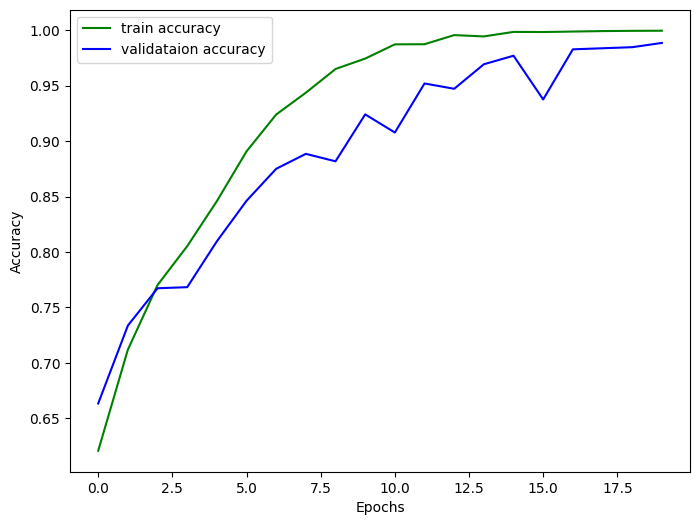

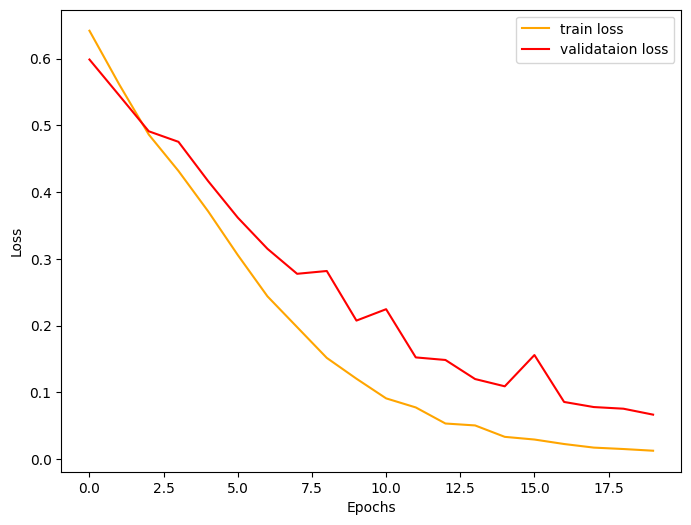

In [25]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(8, 6))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(8, 6))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()
save_plots(train_acc, valid_acc, train_loss, valid_loss)